#### **ROSSMAN DRUG STORES FORECASTING WITH PROPHET:**

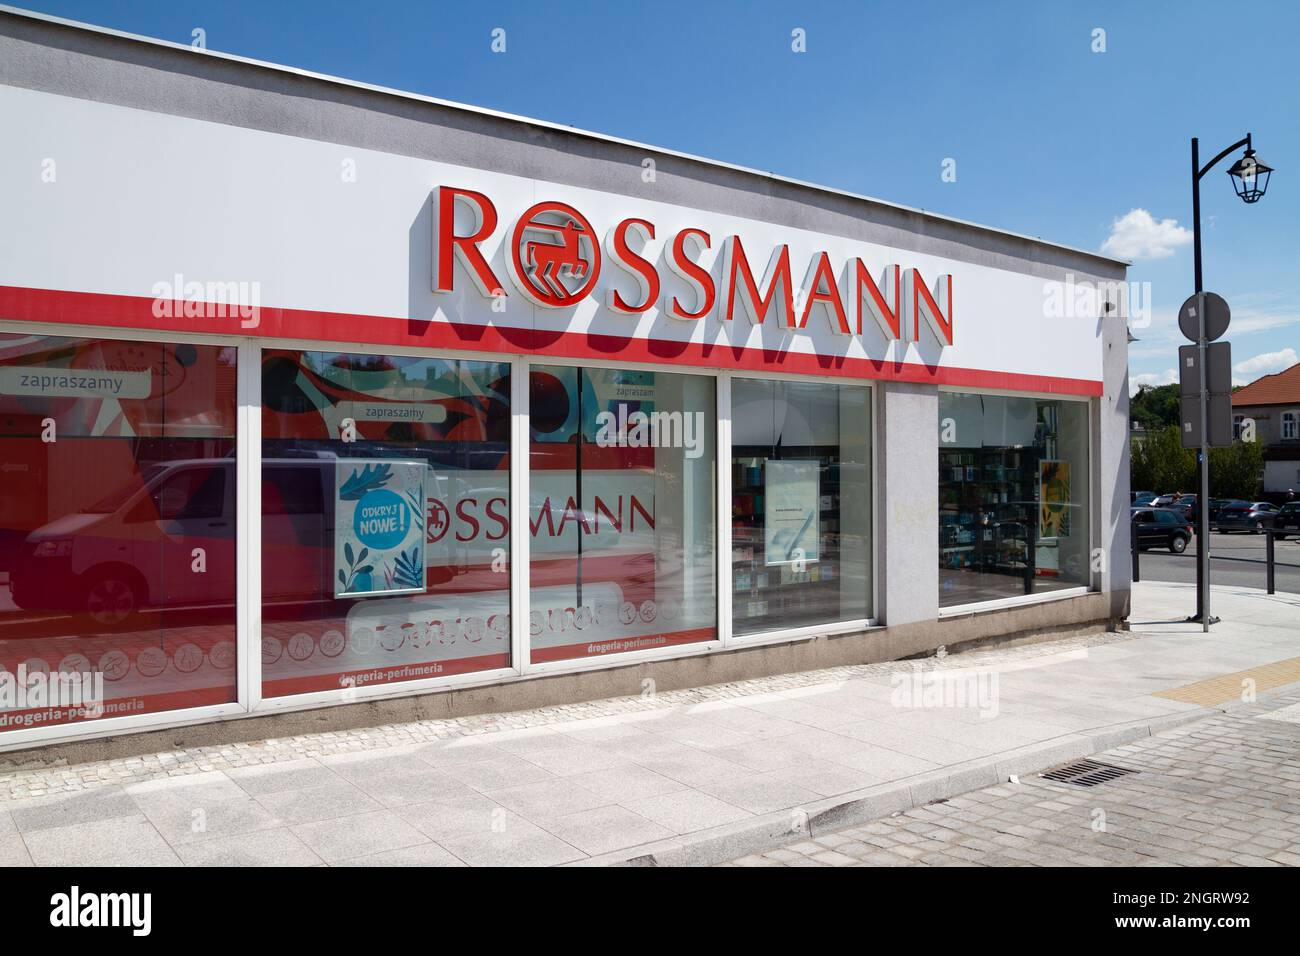

In [1]:
from IPython.display import Image 
Image(filename=r"C:\Users\HP\Downloads\rossman3.jpg",width=850, height=400)

#### **BUSSINESS-PROBLEM**
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

In [2]:
## importimg neccessary libraries  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import itertools
import numpy as np  
from prophet import Prophet
from prophet.plot import plot_components,add_changepoints_to_plot,plot_cross_validation_metric
from prophet.diagnostics import cross_validation,performance_metrics
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"axes.facecolor":"#DAF3F2","axes.grid":False})
np.random.seed(42)


In [3]:
## loading the data  
stores_data = pd.read_csv(r"D:\datasets\Rossmann\train.csv")
## display the first five rows
stores_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
## displaying the first five items 
stores_data.shape

(1017209, 9)

In [5]:
## displaying the general info 
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
## checking for missing values  
stores_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [7]:
## checking for the percentahe of missing values  
stores_data.isnull().mean()*100

Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64

In [8]:
## checking the value counts of the stores  
stores_data['Store'].value_counts()

Store
1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: count, Length: 1115, dtype: int64

#### **filtering out store 1 out of 1,115 drug stores**

In [9]:
## filtering out store 1 
store1 = stores_data[stores_data['Store']==1]
## setting the index of the date 
store1 = store1.set_index("Date")
## sorting for chronological order  
store1 = store1.sort_index()
## showing the five items  
store1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,1,2,0,0,0,0,a,1
2013-01-02,1,3,5530,668,1,0,0,1
2013-01-03,1,4,4327,578,1,0,0,1
2013-01-04,1,5,4486,619,1,0,0,1
2013-01-05,1,6,4997,635,1,0,0,1


#### **visualizing the Sales for store 1**

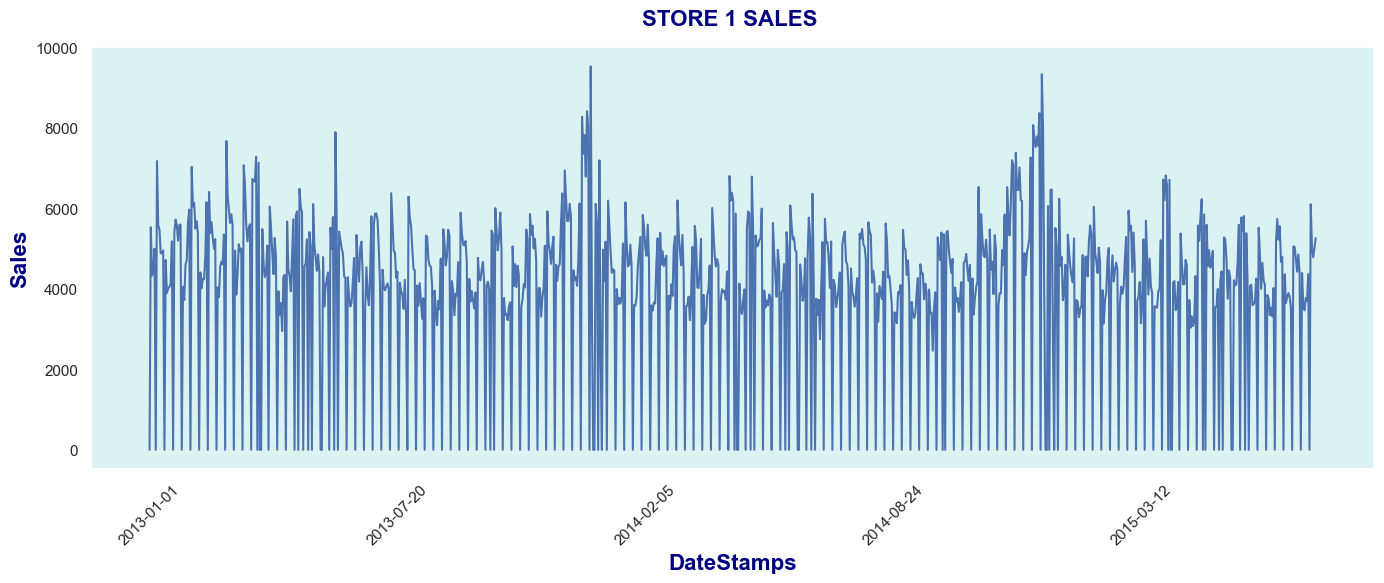

In [10]:
## visualizing thee sales  for store 1
store1['Sales'].plot(figsize=(14,6))
## title  
plt.title("STORE 1 SALES ",fontweight='bold',fontsize=16,pad=16,color='navy')
## xlabel  
plt.xlabel("DateStamps",fontsize=16,fontweight='bold',c='navy')
## ylabel  
plt.ylabel("Sales",fontsize=16,fontweight='bold',c='navy')
## xticks  
plt.xticks(rotation=45)
## spacing  
plt.tight_layout()
## show  
plt.show()

##### 🔎 **KEY INSIGHTS FROM THE PLOT.**
*  Sales Bounce Up and Down A LOT:Store 1's sales aren't steady:They go up and down very frequently
*  Looks Like a Weekly Pattern: This up-and-down happens so regularly it strongly suggests a weekly cycle. Certain days of the week likely have much higher sales than others.
* Zero Sales Happen Regularly: Notice how the sales often drop right down to the bottom line (zero)? This happens repeatedly. It likely means the store is closed on specific days (like Sundays, perhaps?).
* Occasional HUGE Sales Days: Sometimes, the sales peaks go much higher than the usual high points (reaching near 8,000-10,000). These aren't part of the normal weekly bounce; they are special events.
* Overall Sales Level is Stable:While sales jump around day-to-day, the general level seems pretty consistent from 2013 through mid-2015. The store isn't showing obvious overall growth or decline in this picture.

### **filtering out only store open  1 days only**

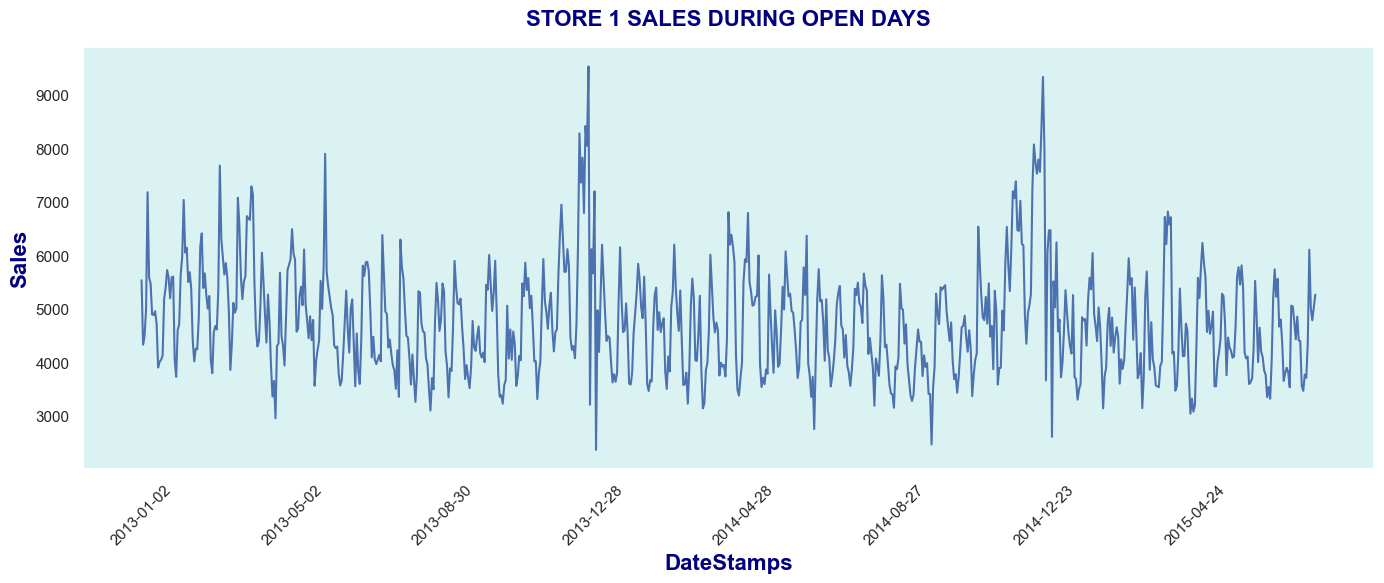

In [11]:
## filtering out only days when the store was opened  
store1_Open = store1[store1['Open']==1]
## visualizing the days when the store was opened  
store1_Open['Sales'].plot(figsize=(14,6))
## title  
plt.title("STORE 1 SALES DURING OPEN DAYS",fontweight='bold',fontsize=16,pad=16,color='navy')
## xlabel  
plt.xlabel("DateStamps",fontsize=16,fontweight='bold',c='navy')
## ylabel  
plt.ylabel("Sales",fontsize=16,fontweight='bold',c='navy')
## xticks  
plt.xticks(rotation=45)
## spacing  
plt.tight_layout()
## show  
plt.show()


#### 🔎 **KEY INSIGHTS FROM THE PLOT**
* Lowest Sales are Around 3000: Now that the closed days (zero sales) are removed, we see that on any day Store 1 is open, it seems to make at least 3,000-4,000 in sales. This is the store's baseline performance when operating.
* Weekly Rhythm Still Exists (But Looks Different): Even without the zero-sales days, there's still a clear, repeating up-and-down pattern happening frequently, very likely weekly.
* Clear Difference Between "Good" and "Okay" Open Days: The weekly pattern now shows a difference between regular open days. Some days consistently hit higher sales peaks (around 6,000-7,500), while others form the lower points of the cycle (around 3,000-5,000).
* Super-Peak Events Still Stand Out: Those occasional massive sales days (reaching 8,000-9,000+) are still clearly visible. They are special events driving sales far above the normal weekly high points.
* Performance is Consistent Overall: Similar to the previous plot, there isn't a strong visual trend of sales growing or shrinking overall during this period (2013-mid 2015) on the days the store is open.

#### **Preparing the data for Prophet**

In [12]:
## preparing the data tthe way prophet likes it  
df_prophet = store1_Open.reset_index()[["Date","Sales"]].rename({"Date":"ds","Sales":"y"},axis='columns')
## show the five items  
df_prophet

,ds,y
0,2013-01-02,5530
1,2013-01-03,4327
2,2013-01-04,4486
3,2013-01-05,4997
4,2013-01-07,7176
...,...,...
776,2015-07-27,6102
777,2015-07-28,5011
778,2015-07-29,4782
779,2015-07-30,5020


In [13]:
## printing the length of df 
print(f"The length of df prophet is",len(df_prophet))

The length of df prophet is 781


### **Training the Base Prophet Model**

In [14]:
### Training the Base Prophet Model 
m = Prophet()
## Fitting the Model  
m.fit(df_prophet)


10:07:08 - cmdstanpy - INFO - Chain [1] start processing
10:07:10 - cmdstanpy - INFO - Chain [1] done processing


### **Making the Future dataframe**

In [15]:
## Making the future dataframe for the Base Model  
future = m.make_future_dataframe(periods=365)
## show the first five rows of the future dataframe  
future.head()

,ds
0,2013-01-02
1,2013-01-03
2,2013-01-04
3,2013-01-05
4,2013-01-07


In [16]:
## show the last  
future.tail()

,ds
1141,2016-07-26
1142,2016-07-27
1143,2016-07-28
1144,2016-07-29
1145,2016-07-30


### **Making Future Forecast with Prophet-Base-Model**

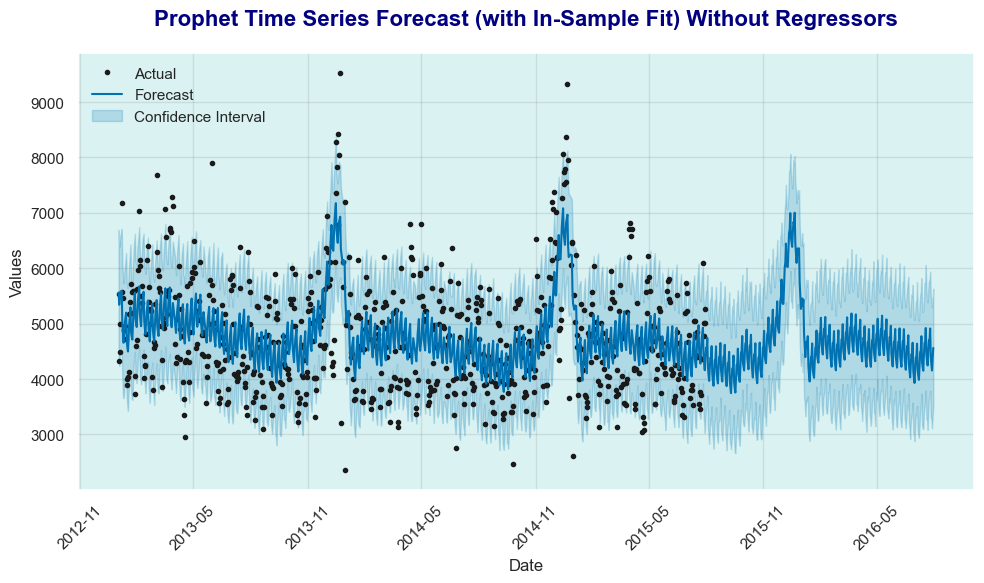

In [17]:
## Making the future teining period  
forecast = m.predict(future)
## plot the foorecast  
fig = m.plot(fcst=forecast)
## title
plt.title("Prophet Time Series Forecast (with In-Sample Fit) Without Regressors", fontsize=16, fontweight='bold', color='navy',pad=20)
## xlabel
plt.xlabel("Date", fontsize=12)
## ylabel
plt.ylabel("Values", fontsize=12)
## grid
# plt.grid(True, linestyle='--', alpha=0.6)
## xticks
plt.xticks(rotation=45)
## adjust spacing
plt.tight_layout()
#Legend
plt.legend(["Actual", "Forecast", "Confidence Interval"], loc='upper left', frameon=False)
# Show the plot
plt.show()

##### 🔎 **KEY INSIGHT FROM THE ABOVE PLOT**

"This first Prophet model is good at seeing the store's basic weekly routine and the main busy times each year. But, it's not accurate enough for making solid plans.

It especially struggles to predict how high sales will actually go during the biggest peaks, and it doesn't explain why sales bounce around so much from one day to the next. We see this because the prediction line (blue line) misses the real top sales numbers (black dots), and the light blue shaded area, showing how unsure the model is, is very wide.

##### **Visualizing the Componets of the plot**

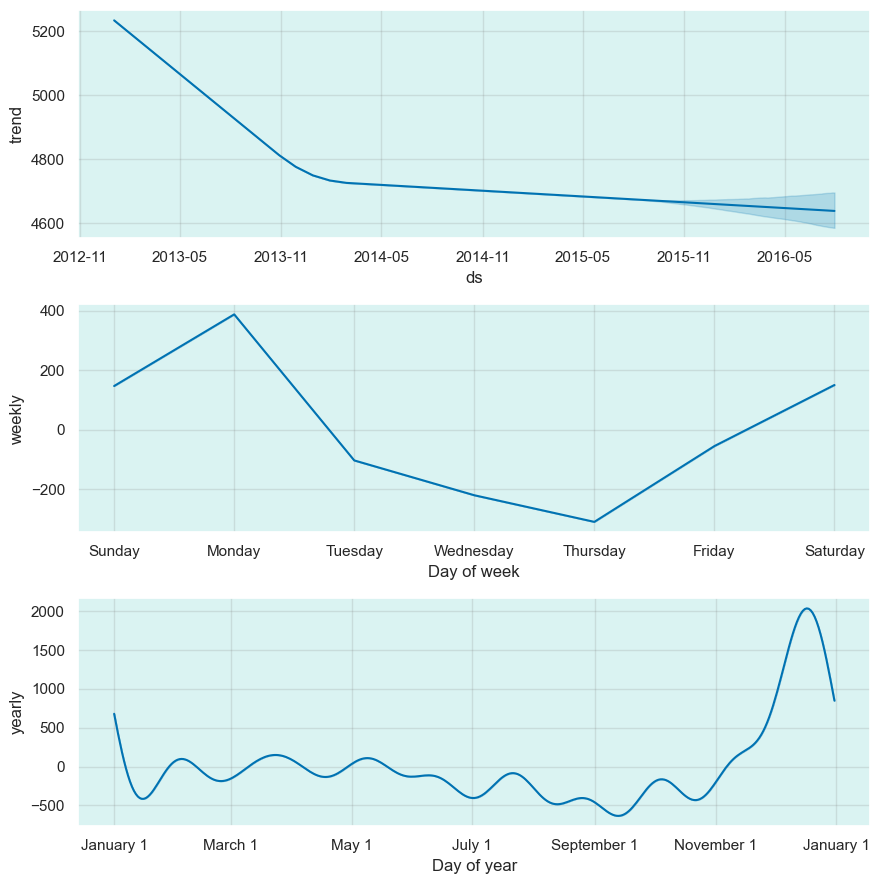

In [18]:
## visualizing the plot componets for model 
fig = m.plot_components(fcst=forecast)

##### 📈 **KEY INSIGHT FROM TREND COMPONENT.**
* Significant Past Decline:Insight: The store's baseline sales level experienced a clear and significant downward trend from late 2012 through roughly mid-2014. Sales were fundamentally decreasing during this period, even after accounting for seasonality.It's crucial to understand why this decline happened,
* Trend Stabilization (But Lower):Around mid-2014, the downward trend stopped or slowed dramatically. The baseline sales level stabilized, although at a lower point than in 2012/early 2013.
* Lack of Recent Growth: From mid-2014 through to the end of the period shown (mid-2016), the underlying trend is mostly flat or possibly slightly declining. It's not showing any significant baseline growth.
* This trend analysis reveals a store that faced a significant baseline decline in 2013 but managed to stabilize by mid-2014. However, since then, underlying growth appears stagnant.

#####  📈 **KEY INSIGHT FROM WEEKLY COMPONENT.**
* Monday is the Strongest Sales Day: Sales are highest on Mondays, peaking above other days. This suggests rossman drug stores are most active at the start of the week. 
* Midweek Sales Drop:Tuesday, Wednesday, and Thursday show much lower sales, with Wednesday and Thursday being the weakest. These are the "trough" days that need attention.
* Weekend Recovery:Sales start to recover on Friday and Saturday, though not as high as Monday. Sunday also performs better than midweek but not as strong as Monday.
* Sales Fluctuate by Day: There is a clear pattern—sales are not steady across the week. Some days are consistently high, while others are low.
##### 🗣️ **RECCOMENDATION** 
* Focus on lifting sales during the slowest days (Tuesday to Thursday) using targeted promotions and marketing. At the same time, make sure you are fully prepared for the busiest days (especially Monday) by having enough products and staff. Always watch for sudden drops in sales, as these can be early warning signs of bigger problems.

##### 📈**KEY INSIGHT FROM YEARLY COMPONENT**
* The yearly component identifies recurring seasonal effects such as holiday spikes (e.g., the strong surge in sales during November-December) and post-holiday dips. Recognizing these patterns allows the model to anticipate predictable fluctuations in demand throughout the year rather than treating all periods as uniform
* Massive Sales Spike in Late November to December:The most dramatic feature is a sharp increase in sales starting around mid-November, peaking in December, and then dropping off after January 1.
* This pattern is almost certainly driven by the holiday season (Christmas, New Year), when consumer spending is at its highest due to gift-giving, holiday preparations, and end-of-year bonuses.
* Post-Holiday Drop in Early January:Immediately after the New Year, sales dip significantly below the yearly average.
* This is likely due to post-holiday fatigue, reduced consumer spending, and possibly inventory depletion. Customers may also be returning unwanted items or holding back on purchases after heavy holiday spending.
* Stable Sales Throughout Most of the Year:From February to the end of October, sales show minor fluctuations but generally remain close to the average, with no major peaks or troughs.
* This suggests that, outside of the holiday season, there are no strong seasonal events driving significant changes in demand. The business can expect steady sales during these months.
* Small Bumps and Dips:There are a few minor rises and falls throughout the year (for example, a small bump near the start of the year and some dips in spring and summer), but none compare to the end-of-year surge.
* These could be linked to smaller holidays, local events, or promotional campaigns, but their impact is much less than the main holiday season.

### 🗣️ **RECOMMENDATION:**
* Focus your operational and marketing strategies on the holiday season, as this is when sales are highest. Prepare well in advance for November and December with more inventory, extra staff, and special promotions. For the rest of the year, maintain steady operations and watch for minor events that might create smaller sales bumps, but do not expect large deviations from the average outside the holiday window

##### **The Forecasted Values for Prophet Base Model**

In [19]:
### getting tthe forecasts  
forecast[['ds','yhat','yhat_lower','yhat_upper']].head(20).style.format(precision=3).background_gradient(cmap='coolwarm')
## formating  


,ds,yhat,yhat_lower,yhat_upper
0,2013-01-02 00:00:00,5560.522,4468.047,6689.745
1,2013-01-03 00:00:00,5341.122,4232.478,6387.272
2,2013-01-04 00:00:00,5471.284,4488.776,6515.491
3,2013-01-05 00:00:00,5559.099,4451.609,6588.168
4,2013-01-07 00:00:00,5587.324,4480.155,6710.595
5,2013-01-08 00:00:00,5007.121,3997.774,6047.074
6,2013-01-09 00:00:00,4811.447,3693.428,5879.812
7,2013-01-10 00:00:00,4654.691,3652.741,5731.962
8,2013-01-11 00:00:00,4853.569,3774.389,5917.200
9,2013-01-12 00:00:00,5014.787,4015.939,6011.379


##### **Incorperating Additional Regressors into the Prophet**

In [20]:
## store 1  
store1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,1,2,0,0,0,0,a,1
2013-01-02,1,3,5530,668,1,0,0,1
2013-01-03,1,4,4327,578,1,0,0,1
2013-01-04,1,5,4486,619,1,0,0,1
2013-01-05,1,6,4997,635,1,0,0,1


In [21]:
## store 1 open  
store1_Open.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-02,1,3,5530,668,1,0,0,1
2013-01-03,1,4,4327,578,1,0,0,1
2013-01-04,1,5,4486,619,1,0,0,1
2013-01-05,1,6,4997,635,1,0,0,1
2013-01-07,1,1,7176,785,1,1,0,1


In [22]:
## checking for the unique values for the different regressors  
print(store1['SchoolHoliday'].unique())
print(store1['StateHoliday'].unique())
print(store1['Promo'].unique())

[1 0]
['a' '0' 'b' 'c' 0]
[0 1]


In [23]:
## open days only 
print(store1_Open['SchoolHoliday'].unique())
print(store1_Open['StateHoliday'].unique())
print(store1_Open['Promo'].unique())

[1 0]
['0' 0]
[0 1]


#### **Adding SchoolHoliday and Promo before Training**

In [24]:
## incooperating the values for the SchoolHoliday and State Holiday into the df prophet  
df_prophet['SchoolHoliday'] = store1_Open['SchoolHoliday'].values 
## Promo  
df_prophet['Promo'] = store1_Open['Promo'].values
## displaying the promo  
df_prophet.head()

,ds,y,SchoolHoliday,Promo
0,2013-01-02,5530,1,0
1,2013-01-03,4327,1,0
2,2013-01-04,4486,1,0
3,2013-01-05,4997,1,0
4,2013-01-07,7176,1,1


##### **Training the Model With Additional Regressors** 

In [25]:
## Initializing the Prophet Model with default paramaters  
m1 = Prophet(changepoint_prior_scale=0.05,changepoint_range=0.8,seasonality_mode="additive",seasonality_prior_scale=10)
## Implicity adding the country Holidays as reegressor (German Holidays Since the stores are located in German)  
m1.add_country_holidays(country_name="DE")
## adding the SchoolHoliday Regressor  
m1.add_regressor("SchoolHoliday",mode="additive")
## adding the Promo  Regressor 
m1.add_regressor("Promo",mode="additive")
## Fitting the Model  
m1.fit(df_prophet)


10:07:15 - cmdstanpy - INFO - Chain [1] start processing
10:07:15 - cmdstanpy - INFO - Chain [1] done processing


##### **Making the future dataframe to incorperate the added regressors**

In [26]:
## making the future dataframe  
future2 =  m1.make_future_dataframe(periods=365)
## display the rows for future 2 dataframe  
future2.head()

,ds
0,2013-01-02
1,2013-01-03
2,2013-01-04
3,2013-01-05
4,2013-01-07


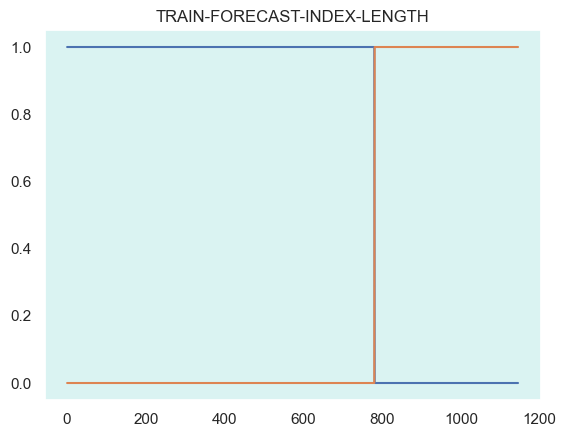

In [27]:
## creating the train and forecast index  
train_index = future2['ds'].isin(df_prophet['ds'])
## creating the forecast index  
forecast_index = ~train_index
## plot  
plt.plot(train_index)
## forecast index  
plt.plot(forecast_index)
## title  
plt.title("TRAIN-FORECAST-INDEX-LENGTH")
## show 
plt.show()

##### **Incorperating the regressors into future dataframe**

In [28]:
### adding the know values to the train index  
future2.loc[train_index,"SchoolHoliday"] = df_prophet['SchoolHoliday'].values 
## Promo  
future2.loc[train_index,"Promo"] = df_prophet['Promo'].values
## School Holidays for the forecast Index (Making an assumption that past Schoolholidays will also repaet into the future)
future2.loc[forecast_index,"SchoolHoliday"] = store1.iloc[-365:]['SchoolHoliday'].values  
## Promo for the forecast Index (Making an assumption that past Promo values will also repaet into the future)
future2.loc[forecast_index,"Promo"] = store1.iloc[-365:]['Promo'].values  
## show the future dataframe  
future2.head()


,ds,SchoolHoliday,Promo
0,2013-01-02,1.0,0.0
1,2013-01-03,1.0,0.0
2,2013-01-04,1.0,0.0
3,2013-01-05,1.0,0.0
4,2013-01-07,1.0,1.0


##### **Making the Forecast for Additional Regressor Model**

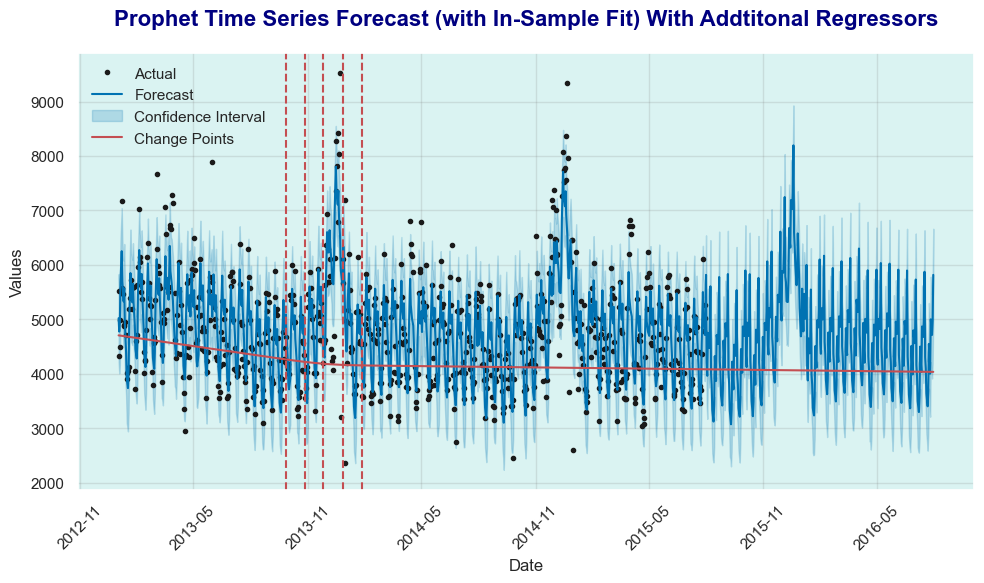

In [29]:
## making the forecast  
forecast2 = m1.predict(future2)
## plot the forecast 
fig = m1.plot(fcst=forecast2)
## add change points  
a = add_changepoints_to_plot(fig.gca(),m=m1 ,fcst=forecast2)
## title
plt.title("Prophet Time Series Forecast (with In-Sample Fit) With Addtitonal Regressors", fontsize=16, fontweight='bold', color='navy',pad=20)
## xlabel
plt.xlabel("Date", fontsize=12)
## ylabel
plt.ylabel("Values", fontsize=12)
## xticks
plt.xticks(rotation=45)
## adjust spacing
plt.tight_layout()
#Legend
plt.legend(["Actual", "Forecast", "Confidence Interval","Change Points"], loc='upper left', frameon=False)
# Show the plot
plt.show()

##### **plotting the Componets**

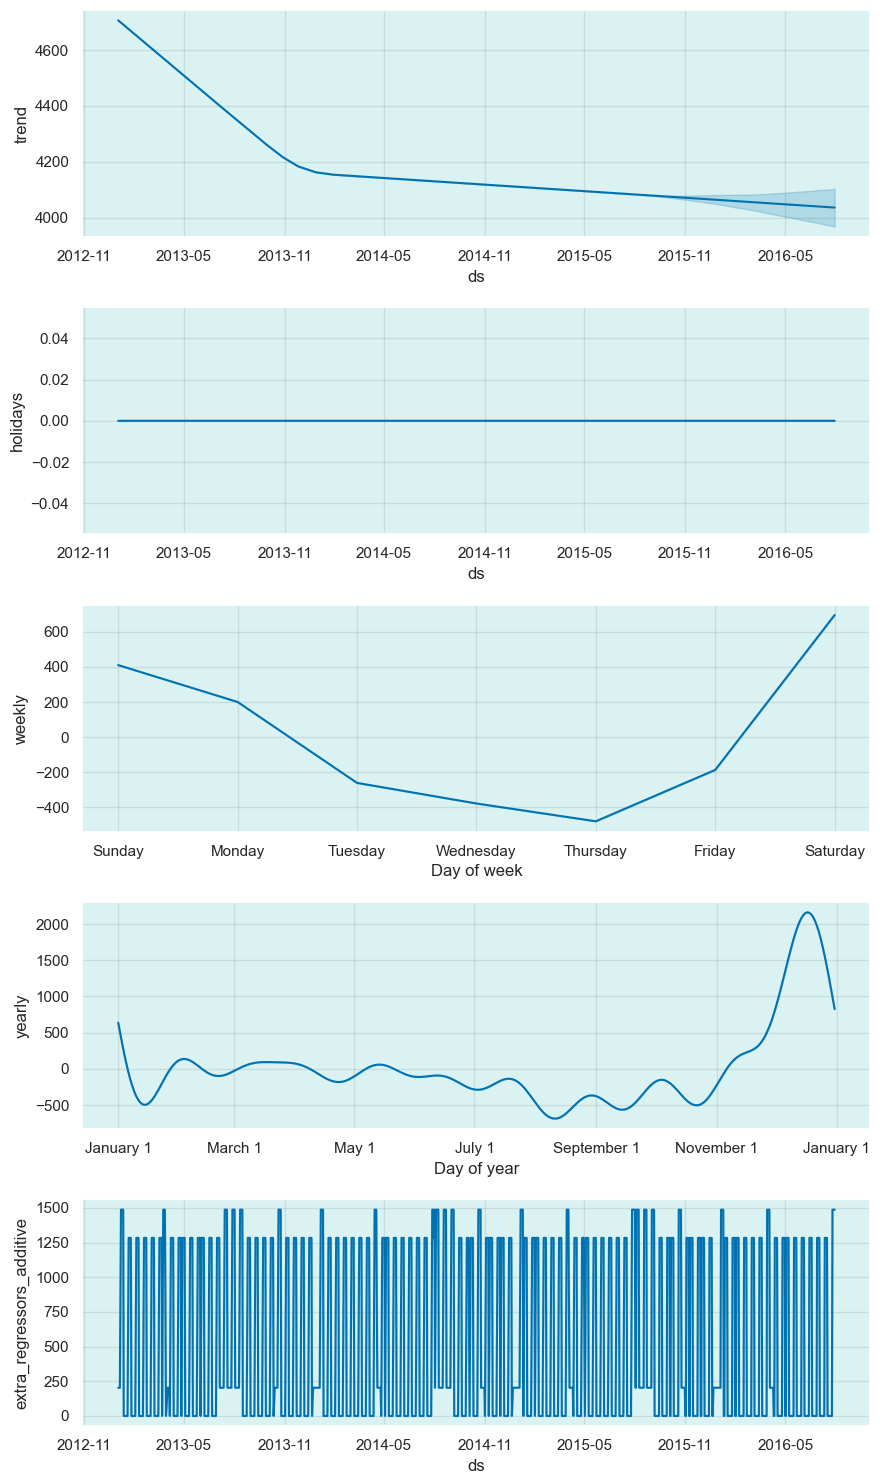

In [30]:
## plotting the components for the forecasted value  
fig = m1.plot_components(fcst=forecast2)

---
#### 📊 ✨ **KEY INSIGHTS FROM EXTRA REGRESSORS COMPONENTS**
---
* There are clear jumps and drops in the values, which means the extra regressors have a strong impact on the forecasted outcome during certain periods.
* Most of the values stay in the higher range (around 1000–1500), but there are clear moments when the value drops close to zero. These low points may signal periods with less activity, fewer sales, or times when special events are not happening
* The pattern repeats every year, which means these high-impact periods are predictable and can be planned for in advance.
* The pattern is not smooth—there are lots of ups and downs, suggesting that the factors captured by these regressors (like promotions, holidays, or special events) are not consistent throughout the year.

##### **CROSS VALDATION**

In [31]:
## Performing Cross-Validation  
## Intitial  
initial = str(2*365) + " days"
## period
period = str(30) + " days"
## Horizon  
horizon = str(42) + " days" 
## print 
print("Using an Initial 2 year training period which is equivalent to ",initial)
print("--"*50)
print("Rolling over every ",period)
print("--"*50)
print("future horizon for the forecasts is",horizon)


Using an Initial 2 year training period which is equivalent to  730 days
----------------------------------------------------------------------------------------------------
Rolling over every  30 days
----------------------------------------------------------------------------------------------------
future horizon for the forecasts is 42 days


##### **cross validating Model with regressors**

In [32]:
##  model 1 
df_cv_m1 = cross_validation(model=m1,initial=initial,period=period,horizon=horizon)

  0%|          | 0/6 [00:00<?, ?it/s]

10:07:23 - cmdstanpy - INFO - Chain [1] start processing
10:07:23 - cmdstanpy - INFO - Chain [1] done processing
10:07:24 - cmdstanpy - INFO - Chain [1] start processing
10:07:24 - cmdstanpy - INFO - Chain [1] done processing
10:07:25 - cmdstanpy - INFO - Chain [1] start processing
10:07:25 - cmdstanpy - INFO - Chain [1] done processing
10:07:26 - cmdstanpy - INFO - Chain [1] start processing
10:07:26 - cmdstanpy - INFO - Chain [1] done processing
10:07:27 - cmdstanpy - INFO - Chain [1] start processing
10:07:27 - cmdstanpy - INFO - Chain [1] done processing
10:07:28 - cmdstanpy - INFO - Chain [1] start processing
10:07:28 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
## rows of the first five  
df_cv_m1.head(10).style.format(precision=3).background_gradient(cmap='coolwarm')

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-21 00:00:00,3496.157,2665.935,4296.097,3299,2015-01-20 00:00:00
1,2015-01-22 00:00:00,3437.637,2648.010,4273.852,3492,2015-01-20 00:00:00
2,2015-01-23 00:00:00,3833.566,2984.271,4681.350,3586,2015-01-20 00:00:00
3,2015-01-24 00:00:00,4754.512,3940.621,5536.819,4840,2015-01-20 00:00:00
4,2015-01-26 00:00:00,5703.881,4876.921,6498.352,4781,2015-01-20 00:00:00
5,2015-01-27 00:00:00,5270.992,4449.869,6067.711,4806,2015-01-20 00:00:00
6,2015-01-28 00:00:00,5204.209,4462.283,5996.324,4310,2015-01-20 00:00:00
7,2015-01-29 00:00:00,5137.725,4357.651,5931.052,5171,2015-01-20 00:00:00
8,2015-01-30 00:00:00,5516.210,4726.397,6410.526,5577,2015-01-20 00:00:00
9,2015-01-31 00:00:00,5119.398,4274.129,5869.854,5363,2015-01-20 00:00:00


##### **performance metrics**

In [34]:
## performance metrics df
print("PERFORMANCE METRICS FOR MODEL WITH REGRESSORS\n")
m1_performance_metrics = performance_metrics(df=df_cv_m1,rolling_window=0.1)
m1_performance_metrics.head(10).style.format(precision=3).background_gradient(cmap='coolwarm')



PERFORMANCE METRICS FOR MODEL WITH REGRESSORS



,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days 00:00:00,202769.702,450.300,372.502,0.100,0.081,0.094,0.950
1,5 days 00:00:00,140788.367,375.218,316.072,0.084,0.070,0.080,0.990
2,6 days 00:00:00,146534.631,382.798,322.142,0.083,0.070,0.081,0.950
3,7 days 00:00:00,173260.843,416.246,359.403,0.088,0.087,0.088,0.950
4,8 days 00:00:00,259168.853,509.086,448.604,0.105,0.096,0.106,0.850
5,9 days 00:00:00,393987.482,627.684,550.727,0.118,0.127,0.122,0.710
6,10 days 00:00:00,548340.814,740.500,628.997,0.124,0.136,0.131,0.600
7,11 days 00:00:00,722896.372,850.233,710.664,0.131,0.163,0.141,0.500
8,12 days 00:00:00,848542.004,921.163,764.479,0.131,0.142,0.143,0.480
9,13 days 00:00:00,808780.581,899.322,733.246,0.124,0.107,0.136,0.540


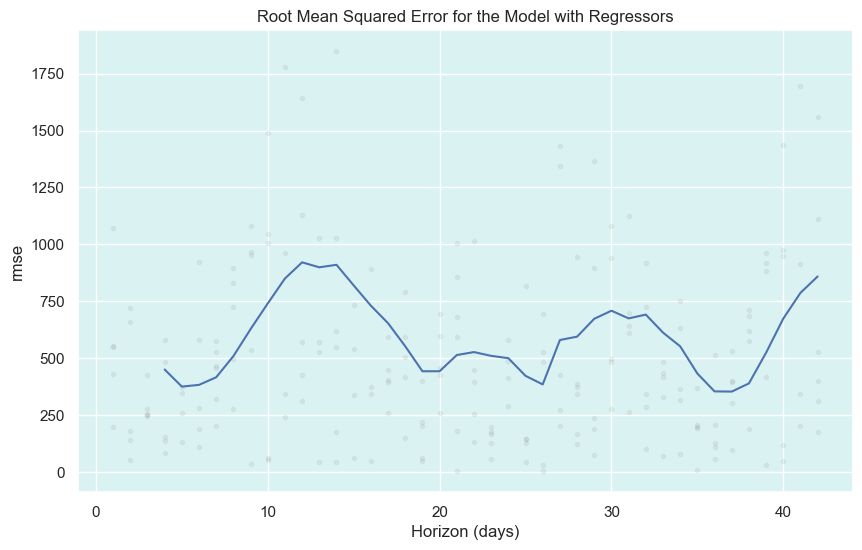

In [35]:
## plotting the metrics  
rmse = plot_cross_validation_metric(df_cv=df_cv_m1,metric="rmse")
plt.title("Root Mean Squared Error for the Model with Regressors")
plt.show()

##### **Cross validating Model Without Regressors**

In [36]:
##  model 1 
df_cv_m = cross_validation(model=m,initial=initial,period=period,horizon=horizon)

  0%|          | 0/6 [00:00<?, ?it/s]

10:07:30 - cmdstanpy - INFO - Chain [1] start processing
10:07:30 - cmdstanpy - INFO - Chain [1] done processing
10:07:30 - cmdstanpy - INFO - Chain [1] start processing
10:07:30 - cmdstanpy - INFO - Chain [1] done processing
10:07:31 - cmdstanpy - INFO - Chain [1] start processing
10:07:31 - cmdstanpy - INFO - Chain [1] done processing
10:07:32 - cmdstanpy - INFO - Chain [1] start processing
10:07:32 - cmdstanpy - INFO - Chain [1] done processing
10:07:33 - cmdstanpy - INFO - Chain [1] start processing
10:07:33 - cmdstanpy - INFO - Chain [1] done processing
10:07:34 - cmdstanpy - INFO - Chain [1] start processing
10:07:34 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
## rows of the first five  
df_cv_m.head(5).style.format(precision=3).background_gradient(cmap='coolwarm')

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-21 00:00:00,4288.017,3274.124,5324.029,3299,2015-01-20 00:00:00
1,2015-01-22 00:00:00,4233.445,3144.478,5229.287,3492,2015-01-20 00:00:00
2,2015-01-23 00:00:00,4582.250,3525.380,5606.137,3586,2015-01-20 00:00:00
3,2015-01-24 00:00:00,4808.413,3596.905,5913.646,4840,2015-01-20 00:00:00
4,2015-01-26 00:00:00,5165.321,4031.657,6203.426,4781,2015-01-20 00:00:00


##### **Performance metrics for model without regressors**

In [38]:
## performance metrics df
print("PERFORMANCE METRICS FOR MODEL WITH OUT REGRESSORS\n")
m_performance_metrics = performance_metrics(df=df_cv_m,rolling_window=0.1)
m_performance_metrics.head(10).style.format(precision=3).background_gradient(cmap='coolwarm')

PERFORMANCE METRICS FOR MODEL WITH OUT REGRESSORS



,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days 00:00:00,905659.380,951.661,825.370,0.237,0.265,0.204,0.650
1,5 days 00:00:00,825322.416,908.473,791.963,0.224,0.226,0.194,0.690
2,6 days 00:00:00,673721.378,820.805,720.252,0.199,0.140,0.176,0.780
3,7 days 00:00:00,452816.705,672.917,559.182,0.149,0.118,0.134,0.900
4,8 days 00:00:00,231041.297,480.668,420.950,0.104,0.097,0.098,1.000
5,9 days 00:00:00,391230.450,625.484,493.716,0.104,0.086,0.105,0.900
6,10 days 00:00:00,697704.700,835.287,657.463,0.123,0.098,0.131,0.800
7,11 days 00:00:00,1087469.269,1042.818,830.523,0.144,0.117,0.160,0.700
8,12 days 00:00:00,1471404.000,1213.014,1047.149,0.177,0.154,0.199,0.600
9,13 days 00:00:00,1580727.967,1257.270,1123.151,0.190,0.175,0.215,0.560


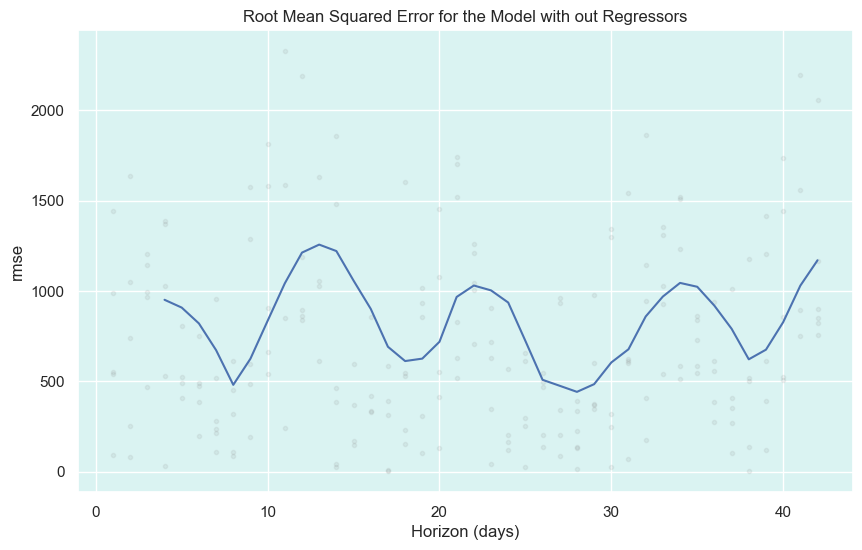

In [39]:
## plotting the metrics  
rmse = plot_cross_validation_metric(df_cv=df_cv_m,metric="rmse")
plt.title("Root Mean Squared Error for the Model with out Regressors")
plt.show()

##### **MODEL COMPARISON BASED ON METRICS**

In [40]:
## MODEL 1 
model1 = pd.DataFrame(m1_performance_metrics.drop(columns='horizon').mean().round(3),columns=['Model with regressors Average Performance Metrics'])
model1['Model with regressors Average std Performace Metrics'] = pd.DataFrame(m1_performance_metrics.drop(columns='horizon').mean().round(3))
model1.T.style.format(precision=3).background_gradient(cmap='RdBu')

,mse,rmse,mae,mape,mdape,smape,coverage
Model with regressors Average Performance Metrics,377378.871,590.889,486.011,0.108,0.098,0.106,0.805
Model with regressors Average std Performace Metrics,377378.871,590.889,486.011,0.108,0.098,0.106,0.805


In [41]:
## model m   
model = pd.DataFrame(m_performance_metrics.drop(columns='horizon').mean().round(3),columns=['Base Model Average Performance Metrics'])
model['Base Model Average std Performace Metrics'] = pd.DataFrame(m_performance_metrics.drop(columns='horizon').mean().round(3))
model.T.style.format(precision=3).background_gradient(cmap='RdBu')


,mse,rmse,mae,mape,mdape,smape,coverage
Base Model Average Performance Metrics,740943.334,831.434,696.366,0.162,0.142,0.153,0.790
Base Model Average std Performace Metrics,740943.334,831.434,696.366,0.162,0.142,0.153,0.790


##### 📊 **MODEL COMPARISON INSIGHTS**
* "Model with regressors" (Model 1) has substantially lower error metrics (MSE, RMSE, MAE, MAPE, MDAPE, SMAPE) compared to the "Base Model".
* The inclusion of regressors significantly improves forecasting accuracy.
* Model with Regressors is Superior: Model 1 outperforms the Base Model across all error metrics, indicating it provides more accurate forecasts.
* Impact of Regressors: The inclusion of additional regressors significantly enhances the model's ability to capture underlying patterns and make better predictions.

### **HYPER-PARAMETER TUNNINIG**

In [42]:
## Tunning the Model  
param_grid = { 
    "changepoint_prior_scale":[0.001,0.01,0.05,0.1,0.5], 
    "seasonality_prior_scale":[0.01,0.1,1.0,10.0]
}
## all parameter combinations  
all_parameter_comb = [dict(zip(param_grid.keys(),v)) for v in itertools.product(*param_grid.values())]
## print all parameter combination 
mapes = []
for params in all_parameter_comb: 
    m = Prophet(**params)
    m.add_regressor("SchoolHoliday",mode="additive")
    m.add_regressor("Promo",mode="additive")
    m.fit(df_prophet)
    df_cv = cross_validation(m,initial=initial,horizon=horizon,period=period)
    df_p = performance_metrics(df_cv,rolling_window=0.1)
    mapes.append(df_p['mape'].values[0])
## finding the best parms  
tunning_results = pd.DataFrame(all_parameter_comb)
tunning_results = mapes


10:07:36 - cmdstanpy - INFO - Chain [1] start processing
10:07:37 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:07:37 - cmdstanpy - INFO - Chain [1] start processing
10:07:37 - cmdstanpy - INFO - Chain [1] done processing
10:07:38 - cmdstanpy - INFO - Chain [1] start processing
10:07:38 - cmdstanpy - INFO - Chain [1] done processing
10:07:39 - cmdstanpy - INFO - Chain [1] start processing
10:07:39 - cmdstanpy - INFO - Chain [1] done processing
10:07:40 - cmdstanpy - INFO - Chain [1] start processing
10:07:41 - cmdstanpy - INFO - Chain [1] done processing
10:07:42 - cmdstanpy - INFO - Chain [1] start processing
10:07:42 - cmdstanpy - INFO - Chain [1] done processing
10:07:43 - cmdstanpy - INFO - Chain [1] start processing
10:07:43 - cmdstanpy - INFO - Chain [1] done processing
10:07:44 - cmdstanpy - INFO - Chain [1] start processing
10:07:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:07:45 - cmdstanpy - INFO - Chain [1] start processing
10:07:45 - cmdstanpy - INFO - Chain [1] done processing
10:07:46 - cmdstanpy - INFO - Chain [1] start processing
10:07:46 - cmdstanpy - INFO - Chain [1] done processing
10:07:47 - cmdstanpy - INFO - Chain [1] start processing
10:07:48 - cmdstanpy - INFO - Chain [1] done processing
10:07:48 - cmdstanpy - INFO - Chain [1] start processing
10:07:49 - cmdstanpy - INFO - Chain [1] done processing
10:07:50 - cmdstanpy - INFO - Chain [1] start processing
10:07:50 - cmdstanpy - INFO - Chain [1] done processing
10:07:50 - cmdstanpy - INFO - Chain [1] start processing
10:07:51 - cmdstanpy - INFO - Chain [1] done processing
10:07:52 - cmdstanpy - INFO - Chain [1] start processing
10:07:52 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:07:53 - cmdstanpy - INFO - Chain [1] start processing
10:07:53 - cmdstanpy - INFO - Chain [1] done processing
10:07:54 - cmdstanpy - INFO - Chain [1] start processing
10:07:54 - cmdstanpy - INFO - Chain [1] done processing
10:07:54 - cmdstanpy - INFO - Chain [1] start processing
10:07:54 - cmdstanpy - INFO - Chain [1] done processing
10:07:55 - cmdstanpy - INFO - Chain [1] start processing
10:07:55 - cmdstanpy - INFO - Chain [1] done processing
10:07:56 - cmdstanpy - INFO - Chain [1] start processing
10:07:56 - cmdstanpy - INFO - Chain [1] done processing
10:07:57 - cmdstanpy - INFO - Chain [1] start processing
10:07:57 - cmdstanpy - INFO - Chain [1] done processing
10:07:58 - cmdstanpy - INFO - Chain [1] start processing
10:07:58 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:07:59 - cmdstanpy - INFO - Chain [1] start processing
10:07:59 - cmdstanpy - INFO - Chain [1] done processing
10:08:00 - cmdstanpy - INFO - Chain [1] start processing
10:08:00 - cmdstanpy - INFO - Chain [1] done processing
10:08:01 - cmdstanpy - INFO - Chain [1] start processing
10:08:01 - cmdstanpy - INFO - Chain [1] done processing
10:08:02 - cmdstanpy - INFO - Chain [1] start processing
10:08:02 - cmdstanpy - INFO - Chain [1] done processing
10:08:02 - cmdstanpy - INFO - Chain [1] start processing
10:08:03 - cmdstanpy - INFO - Chain [1] done processing
10:08:03 - cmdstanpy - INFO - Chain [1] start processing
10:08:03 - cmdstanpy - INFO - Chain [1] done processing
10:08:04 - cmdstanpy - INFO - Chain [1] start processing
10:08:04 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:08:05 - cmdstanpy - INFO - Chain [1] start processing
10:08:05 - cmdstanpy - INFO - Chain [1] done processing
10:08:06 - cmdstanpy - INFO - Chain [1] start processing
10:08:06 - cmdstanpy - INFO - Chain [1] done processing
10:08:06 - cmdstanpy - INFO - Chain [1] start processing
10:08:06 - cmdstanpy - INFO - Chain [1] done processing
10:08:07 - cmdstanpy - INFO - Chain [1] start processing
10:08:07 - cmdstanpy - INFO - Chain [1] done processing
10:08:07 - cmdstanpy - INFO - Chain [1] start processing
10:08:07 - cmdstanpy - INFO - Chain [1] done processing
10:08:08 - cmdstanpy - INFO - Chain [1] start processing
10:08:08 - cmdstanpy - INFO - Chain [1] done processing
10:08:09 - cmdstanpy - INFO - Chain [1] start processing
10:08:09 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:08:09 - cmdstanpy - INFO - Chain [1] start processing
10:08:09 - cmdstanpy - INFO - Chain [1] done processing
10:08:10 - cmdstanpy - INFO - Chain [1] start processing
10:08:10 - cmdstanpy - INFO - Chain [1] done processing
10:08:10 - cmdstanpy - INFO - Chain [1] start processing
10:08:11 - cmdstanpy - INFO - Chain [1] done processing
10:08:11 - cmdstanpy - INFO - Chain [1] start processing
10:08:11 - cmdstanpy - INFO - Chain [1] done processing
10:08:12 - cmdstanpy - INFO - Chain [1] start processing
10:08:12 - cmdstanpy - INFO - Chain [1] done processing
10:08:12 - cmdstanpy - INFO - Chain [1] start processing
10:08:13 - cmdstanpy - INFO - Chain [1] done processing
10:08:13 - cmdstanpy - INFO - Chain [1] start processing
10:08:13 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:08:14 - cmdstanpy - INFO - Chain [1] start processing
10:08:14 - cmdstanpy - INFO - Chain [1] done processing
10:08:14 - cmdstanpy - INFO - Chain [1] start processing
10:08:14 - cmdstanpy - INFO - Chain [1] done processing
10:08:15 - cmdstanpy - INFO - Chain [1] start processing
10:08:15 - cmdstanpy - INFO - Chain [1] done processing
10:08:15 - cmdstanpy - INFO - Chain [1] start processing
10:08:16 - cmdstanpy - INFO - Chain [1] done processing
10:08:16 - cmdstanpy - INFO - Chain [1] start processing
10:08:16 - cmdstanpy - INFO - Chain [1] done processing
10:08:17 - cmdstanpy - INFO - Chain [1] start processing
10:08:17 - cmdstanpy - INFO - Chain [1] done processing
10:08:18 - cmdstanpy - INFO - Chain [1] start processing
10:08:18 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:08:18 - cmdstanpy - INFO - Chain [1] start processing
10:08:18 - cmdstanpy - INFO - Chain [1] done processing
10:08:19 - cmdstanpy - INFO - Chain [1] start processing
10:08:19 - cmdstanpy - INFO - Chain [1] done processing
10:08:19 - cmdstanpy - INFO - Chain [1] start processing
10:08:19 - cmdstanpy - INFO - Chain [1] done processing
10:08:20 - cmdstanpy - INFO - Chain [1] start processing
10:08:20 - cmdstanpy - INFO - Chain [1] done processing
10:08:20 - cmdstanpy - INFO - Chain [1] start processing
10:08:21 - cmdstanpy - INFO - Chain [1] done processing
10:08:21 - cmdstanpy - INFO - Chain [1] start processing
10:08:21 - cmdstanpy - INFO - Chain [1] done processing
10:08:22 - cmdstanpy - INFO - Chain [1] start processing
10:08:22 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:08:22 - cmdstanpy - INFO - Chain [1] start processing
10:08:23 - cmdstanpy - INFO - Chain [1] done processing
10:08:23 - cmdstanpy - INFO - Chain [1] start processing
10:08:23 - cmdstanpy - INFO - Chain [1] done processing
10:08:23 - cmdstanpy - INFO - Chain [1] start processing
10:08:24 - cmdstanpy - INFO - Chain [1] done processing
10:08:24 - cmdstanpy - INFO - Chain [1] start processing
10:08:24 - cmdstanpy - INFO - Chain [1] done processing
10:08:25 - cmdstanpy - INFO - Chain [1] start processing
10:08:25 - cmdstanpy - INFO - Chain [1] done processing
10:08:26 - cmdstanpy - INFO - Chain [1] start processing
10:08:26 - cmdstanpy - INFO - Chain [1] done processing
10:08:26 - cmdstanpy - INFO - Chain [1] start processing
10:08:27 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:08:27 - cmdstanpy - INFO - Chain [1] start processing
10:08:27 - cmdstanpy - INFO - Chain [1] done processing
10:08:28 - cmdstanpy - INFO - Chain [1] start processing
10:08:28 - cmdstanpy - INFO - Chain [1] done processing
10:08:28 - cmdstanpy - INFO - Chain [1] start processing
10:08:29 - cmdstanpy - INFO - Chain [1] done processing
10:08:29 - cmdstanpy - INFO - Chain [1] start processing
10:08:29 - cmdstanpy - INFO - Chain [1] done processing
10:08:30 - cmdstanpy - INFO - Chain [1] start processing
10:08:30 - cmdstanpy - INFO - Chain [1] done processing
10:08:30 - cmdstanpy - INFO - Chain [1] start processing
10:08:30 - cmdstanpy - INFO - Chain [1] done processing
10:08:31 - cmdstanpy - INFO - Chain [1] start processing
10:08:31 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:08:31 - cmdstanpy - INFO - Chain [1] start processing
10:08:32 - cmdstanpy - INFO - Chain [1] done processing
10:08:32 - cmdstanpy - INFO - Chain [1] start processing
10:08:32 - cmdstanpy - INFO - Chain [1] done processing
10:08:33 - cmdstanpy - INFO - Chain [1] start processing
10:08:33 - cmdstanpy - INFO - Chain [1] done processing
10:08:34 - cmdstanpy - INFO - Chain [1] start processing
10:08:34 - cmdstanpy - INFO - Chain [1] done processing
10:08:34 - cmdstanpy - INFO - Chain [1] start processing
10:08:34 - cmdstanpy - INFO - Chain [1] done processing
10:08:35 - cmdstanpy - INFO - Chain [1] start processing
10:08:35 - cmdstanpy - INFO - Chain [1] done processing
10:08:35 - cmdstanpy - INFO - Chain [1] start processing
10:08:36 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:08:36 - cmdstanpy - INFO - Chain [1] start processing
10:08:36 - cmdstanpy - INFO - Chain [1] done processing
10:08:36 - cmdstanpy - INFO - Chain [1] start processing
10:08:37 - cmdstanpy - INFO - Chain [1] done processing
10:08:37 - cmdstanpy - INFO - Chain [1] start processing
10:08:38 - cmdstanpy - INFO - Chain [1] done processing
10:08:38 - cmdstanpy - INFO - Chain [1] start processing
10:08:38 - cmdstanpy - INFO - Chain [1] done processing
10:08:38 - cmdstanpy - INFO - Chain [1] start processing
10:08:39 - cmdstanpy - INFO - Chain [1] done processing
10:08:39 - cmdstanpy - INFO - Chain [1] start processing
10:08:39 - cmdstanpy - INFO - Chain [1] done processing
10:08:40 - cmdstanpy - INFO - Chain [1] start processing
10:08:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:08:40 - cmdstanpy - INFO - Chain [1] start processing
10:08:41 - cmdstanpy - INFO - Chain [1] done processing
10:08:41 - cmdstanpy - INFO - Chain [1] start processing
10:08:41 - cmdstanpy - INFO - Chain [1] done processing
10:08:42 - cmdstanpy - INFO - Chain [1] start processing
10:08:42 - cmdstanpy - INFO - Chain [1] done processing
10:08:42 - cmdstanpy - INFO - Chain [1] start processing
10:08:43 - cmdstanpy - INFO - Chain [1] done processing
10:08:43 - cmdstanpy - INFO - Chain [1] start processing
10:08:43 - cmdstanpy - INFO - Chain [1] done processing
10:08:43 - cmdstanpy - INFO - Chain [1] start processing
10:08:44 - cmdstanpy - INFO - Chain [1] done processing
10:08:44 - cmdstanpy - INFO - Chain [1] start processing
10:08:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:08:45 - cmdstanpy - INFO - Chain [1] start processing
10:08:45 - cmdstanpy - INFO - Chain [1] done processing
10:08:46 - cmdstanpy - INFO - Chain [1] start processing
10:08:46 - cmdstanpy - INFO - Chain [1] done processing
10:08:46 - cmdstanpy - INFO - Chain [1] start processing
10:08:46 - cmdstanpy - INFO - Chain [1] done processing
10:08:47 - cmdstanpy - INFO - Chain [1] start processing
10:08:47 - cmdstanpy - INFO - Chain [1] done processing
10:08:47 - cmdstanpy - INFO - Chain [1] start processing
10:08:47 - cmdstanpy - INFO - Chain [1] done processing
10:08:48 - cmdstanpy - INFO - Chain [1] start processing
10:08:48 - cmdstanpy - INFO - Chain [1] done processing
10:08:49 - cmdstanpy - INFO - Chain [1] start processing
10:08:49 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:08:50 - cmdstanpy - INFO - Chain [1] start processing
10:08:50 - cmdstanpy - INFO - Chain [1] done processing
10:08:50 - cmdstanpy - INFO - Chain [1] start processing
10:08:50 - cmdstanpy - INFO - Chain [1] done processing
10:08:51 - cmdstanpy - INFO - Chain [1] start processing
10:08:51 - cmdstanpy - INFO - Chain [1] done processing
10:08:51 - cmdstanpy - INFO - Chain [1] start processing
10:08:52 - cmdstanpy - INFO - Chain [1] done processing
10:08:52 - cmdstanpy - INFO - Chain [1] start processing
10:08:52 - cmdstanpy - INFO - Chain [1] done processing
10:08:53 - cmdstanpy - INFO - Chain [1] start processing
10:08:53 - cmdstanpy - INFO - Chain [1] done processing
10:08:54 - cmdstanpy - INFO - Chain [1] start processing
10:08:54 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:08:54 - cmdstanpy - INFO - Chain [1] start processing
10:08:54 - cmdstanpy - INFO - Chain [1] done processing
10:08:55 - cmdstanpy - INFO - Chain [1] start processing
10:08:55 - cmdstanpy - INFO - Chain [1] done processing
10:08:55 - cmdstanpy - INFO - Chain [1] start processing
10:08:56 - cmdstanpy - INFO - Chain [1] done processing
10:08:56 - cmdstanpy - INFO - Chain [1] start processing
10:08:56 - cmdstanpy - INFO - Chain [1] done processing
10:08:57 - cmdstanpy - INFO - Chain [1] start processing
10:08:57 - cmdstanpy - INFO - Chain [1] done processing
10:08:57 - cmdstanpy - INFO - Chain [1] start processing
10:08:58 - cmdstanpy - INFO - Chain [1] done processing
10:08:58 - cmdstanpy - INFO - Chain [1] start processing
10:08:58 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:08:59 - cmdstanpy - INFO - Chain [1] start processing
10:08:59 - cmdstanpy - INFO - Chain [1] done processing
10:08:59 - cmdstanpy - INFO - Chain [1] start processing
10:09:00 - cmdstanpy - INFO - Chain [1] done processing
10:09:00 - cmdstanpy - INFO - Chain [1] start processing
10:09:00 - cmdstanpy - INFO - Chain [1] done processing
10:09:01 - cmdstanpy - INFO - Chain [1] start processing
10:09:02 - cmdstanpy - INFO - Chain [1] done processing
10:09:02 - cmdstanpy - INFO - Chain [1] start processing
10:09:02 - cmdstanpy - INFO - Chain [1] done processing
10:09:02 - cmdstanpy - INFO - Chain [1] start processing
10:09:03 - cmdstanpy - INFO - Chain [1] done processing
10:09:03 - cmdstanpy - INFO - Chain [1] start processing
10:09:03 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:09:04 - cmdstanpy - INFO - Chain [1] start processing
10:09:04 - cmdstanpy - INFO - Chain [1] done processing
10:09:05 - cmdstanpy - INFO - Chain [1] start processing
10:09:05 - cmdstanpy - INFO - Chain [1] done processing
10:09:06 - cmdstanpy - INFO - Chain [1] start processing
10:09:06 - cmdstanpy - INFO - Chain [1] done processing
10:09:06 - cmdstanpy - INFO - Chain [1] start processing
10:09:06 - cmdstanpy - INFO - Chain [1] done processing
10:09:07 - cmdstanpy - INFO - Chain [1] start processing
10:09:07 - cmdstanpy - INFO - Chain [1] done processing
10:09:07 - cmdstanpy - INFO - Chain [1] start processing
10:09:08 - cmdstanpy - INFO - Chain [1] done processing
10:09:08 - cmdstanpy - INFO - Chain [1] start processing
10:09:08 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:09:09 - cmdstanpy - INFO - Chain [1] start processing
10:09:09 - cmdstanpy - INFO - Chain [1] done processing
10:09:09 - cmdstanpy - INFO - Chain [1] start processing
10:09:10 - cmdstanpy - INFO - Chain [1] done processing
10:09:10 - cmdstanpy - INFO - Chain [1] start processing
10:09:10 - cmdstanpy - INFO - Chain [1] done processing
10:09:11 - cmdstanpy - INFO - Chain [1] start processing
10:09:11 - cmdstanpy - INFO - Chain [1] done processing
10:09:11 - cmdstanpy - INFO - Chain [1] start processing
10:09:12 - cmdstanpy - INFO - Chain [1] done processing
10:09:12 - cmdstanpy - INFO - Chain [1] start processing
10:09:13 - cmdstanpy - INFO - Chain [1] done processing
10:09:13 - cmdstanpy - INFO - Chain [1] start processing
10:09:14 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

10:09:14 - cmdstanpy - INFO - Chain [1] start processing
10:09:14 - cmdstanpy - INFO - Chain [1] done processing
10:09:15 - cmdstanpy - INFO - Chain [1] start processing
10:09:15 - cmdstanpy - INFO - Chain [1] done processing
10:09:16 - cmdstanpy - INFO - Chain [1] start processing
10:09:16 - cmdstanpy - INFO - Chain [1] done processing
10:09:16 - cmdstanpy - INFO - Chain [1] start processing
10:09:17 - cmdstanpy - INFO - Chain [1] done processing
10:09:17 - cmdstanpy - INFO - Chain [1] start processing
10:09:17 - cmdstanpy - INFO - Chain [1] done processing
10:09:18 - cmdstanpy - INFO - Chain [1] start processing
10:09:18 - cmdstanpy - INFO - Chain [1] done processing
